#📘 LangChain Notes – Core Components

LangChain is a powerful framework that simplifies the development of applications powered by large language models (LLMs). Its modular design enables developers to combine models, prompts, memory, tools, agents, and data access patterns effectively.

#1. 🧠 Model
🔹 What is it?

>The LLM (e.g., OpenAI, Anthropic, Google Gemini, Cohere) that generates outputs (completions, chat, function calls).

>Acts as the brain of your LangChain application.

🔹 Usage



```
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model="gpt-4", temperature=0.7)

```




🔹 Common Providers

>OpenAI – ChatGPT models (e.g., gpt-3.5-turbo, gpt-4)

>Google – Gemini 1.5 Flash, Gemini Pro (via langchain-google-genai)

>Anthropic, Cohere, Mistral, and more

🔹 🧪 Example 1: ChatGPT (OpenAI) Integration



```
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4",
    temperature=0.3,
    api_key="your-openai-api-key"  # Set via env var or directly
)

response = llm.predict("Explain what is a chain in LangChain.")
print(response)

```

🔹 🧪 Example 2: Google Gemini Flash (via langchain-google-genai)


```
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.3,
    google_api_key="your-google-api-key"
)

response = llm.invoke("Give me a use case of agentic AI in finance.")
print(response)

```


🔹 Role in Chain

>Every step that requires language understanding or generation uses the LLM.

>Used inside prompts, chains, tools, or agents.


#2. 💬 Prompts
🔹 What is it?

>Instructions + context + input to guide the model's behavior.

🔹 Types

>PromptTemplate: Static with placeholders.

>ChatPromptTemplate: For structured chat messages.

🔹 Usage



```
from langchain.prompts import PromptTemplate
prompt = PromptTemplate(
    input_variables=["topic"],
    template="Write a short blog post about {topic}."
)

```

🔹 Types of Prompt Templates in LangChain

1️⃣ Dynamic & Reusable Prompt

>Designed using placeholders so they can adapt to any user input.

>Useful in LLMChain, where input variables are passed at runtime.

✅ Code Example



```
from langchain.prompts import PromptTemplate

prompt = PromptTemplate(
    input_variables=["topic"],
    template="Write a short blog post about {topic}."
)

print(prompt.format(topic="Artificial Intelligence"))

```
2️⃣ Role-Based Prompt
>Sets the role or persona for the LLM (e.g., teacher, lawyer, advisor).

>Guides tone, language, and depth of responses.

✅ Code Example

```
from langchain.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a financial advisor helping users manage their budget."),
    ("human", "{user_input}")
])

formatted = prompt.format_messages(user_input="How should I save for retirement?")

```
3️⃣ Few-Shot Prompt
>Includes examples (input-output pairs) to guide the model's behavior.

>Makes the model more predictable on similar tasks.

✅ Code Example
```
from langchain.prompts import FewShotPromptTemplate, PromptTemplate

examples = [
    {"question": "What is 2 + 2?", "answer": "4"},
    {"question": "What is the capital of France?", "answer": "Paris"},
]

example_template = PromptTemplate(
    input_variables=["question", "answer"],
    template="Q: {question}\nA: {answer}"
)

prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_template,
    suffix="Q: {input}\nA:",
    input_variables=["input"]
)

print(prompt.format(input="Who wrote Hamlet?"))
```
🔹 Role in Chain
>Defines how the model is instructed at every step.

>Can vary dynamically based on inputs and memory.


#3. 🔗 Chains
🔹 What is it?

>A sequence of calls (model + prompt + logic) where output of one step becomes input to another.

🔹 Types
>Simple LLMChain: Prompt + LLM.

>SequentialChain: Multiple chained LLM steps.

>RouterChain: Routes input to sub-chains based on conditions.

🔹 Usage



```
from langchain.chains import LLMChain
chain = LLMChain(llm=llm, prompt=prompt)
output = chain.run("Generative AI")

```

🔹 Role in LangChain
>Coordinates the flow of data across steps.

>Central mechanism to compose logic.

🔹 Types of Chains

1️⃣ LLMChain (Basic)

>Single-step execution: Prompt ➡️ Model ➡️ Output



```
from langchain.chains import LLMChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

llm = ChatOpenAI(model="gpt-4", temperature=0)
prompt = PromptTemplate.from_template("Tell me a joke about {topic}")

chain = LLMChain(llm=llm, prompt=prompt)
print(chain.run("AI"))

```

#2️⃣ Parallel Chain (MultiPromptChain)
>Runs multiple prompts in parallel, aggregates their outputs.

>Good for multi-perspective generation, summarization, or analysis.

✅ Code Example
```
from langchain.chains import MultiPromptChain
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate

llm = ChatOpenAI()

prompts = {
    "formal": PromptTemplate.from_template("Write a formal explanation of {topic}."),
    "funny": PromptTemplate.from_template("Make a joke about {topic}."),
}

chain = MultiPromptChain(
    llm=llm,
    prompt_map=prompts,
    default_chain=None,
    verbose=True
)

print(chain.run("quantum computing"))

```

3️⃣ Conditional Chain (RouterChain)
>Routes input to different sub-chains based on conditions (rules, keywords).

>Used for domain-specific logic or branching.

```
from langchain.chains.router import MultiRouteChain
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI()

science_prompt = PromptTemplate.from_template("Explain the science topic: {input}")
math_prompt = PromptTemplate.from_template("Solve the math problem: {input}")

science_chain = LLMChain(llm=llm, prompt=science_prompt)
math_chain = LLMChain(llm=llm, prompt=math_prompt)

def router_func(input_str):
    if "solve" in input_str.lower():
        return "math"
    return "science"

chain = MultiRouteChain(
    default_chain=science_chain,
    destination_chains={"math": math_chain, "science": science_chain},
    router=router_func
)

print(chain.run("Solve 5 + 3"))
print(chain.run("Explain black holes"))

```
#🧠 Summary

| Type              | Purpose                          | Example Use              |
| ----------------- | -------------------------------- | ------------------------ |
| LLMChain          | Basic prompt-model chain         | Prompting with one input |
| Parallel Chain    | Run multiple prompts in parallel | Tone/style generation    |
| Conditional Chain | Route input to subchains         | Task switching by topic  |






#4. 🧠 Memory
🔹 What is it?
>Stores context across interactions (chat history, variable memory).

>Enables multi-turn conversations or reuse of past outputs.



#💬 Interaction 1:
```
User Input:
Who is Narendra Modi?

LLM API Output:
Narendra Modi is an Indian politician serving as the 14th and current Prime Minister of India since May 2014.

```

#💬 Interaction 2:

```
User Input:
How old is he?

LLM API Output:
As an AI, I don't have access to personal data about individuals unless it has been shared with me in the course of our conversation.
```

#📘 Explanation: What Does "LLM API Calls are Stateless" Mean?
🧠 Statelessness in LLM APIs:
>Stateless API means the model does not remember previous user inputs unless you explicitly pass them again.

>Each call to the LLM is independent and lacks memory of past interactions.

🔍 Breakdown of the Example

| Step | Input                   | Model's Understanding                                                              | Output                                     |
| ---- | ----------------------- | ---------------------------------------------------------------------------------- | ------------------------------------------ |
| 1️⃣  | “Who is Narendra Modi?” | Has enough context to answer directly                                              | Gives correct factual info                 |
| 2️⃣  | “How old is he?”        | Doesn't know who “he” refers to because it **doesn’t remember** prior conversation | Returns generic "no personal data" message |


```
# Install required package if not already installed
# !pip install langchain-google-genai

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

# Initialize the Gemini Flash LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.3,
    google_api_key="YOUR_GOOGLE_API_KEY"  # Or set using os.environ["GOOGLE_API_KEY"]
)

# Set up memory to retain conversation context
memory = ConversationBufferMemory()

# Build conversation chain with memory
chain = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True
)

# Interaction 1
response1 = chain.run("Who is Narendra Modi?")
print("Response 1:", response1)

# Interaction 2
response2 = chain.run("How old is he?")
print("Response 2:", response2)
```

🔹 Types
>ConversationBufferMemory (chat history)

>ConversationBufferWindowMemory (keep last N number of interactions)

>ConversationSummaryMemory (summarized memory)

>VectorStoreRetrieverMemory (retrieval-augmented)

🔹 Usage

```
from langchain.memory import ConversationBufferMemory
memory = ConversationBufferMemory()

```

🔹 Role in Chain

>Injects relevant past context into prompts automatically.

>Essential for agents, chatbots, and workflows.

#5. 📚 Indexes (Retrievers & Vector Stores)
🔹 What is it?
>Converts unstructured data into searchable format.

>Used for Retrieval-Augmented Generation (RAG).

🔹 Types
>VectorStore (FAISS, Chroma, Pinecone)

>Retriever wraps around index to fetch top-k matches.

🔹 Usage


```
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

index = FAISS.from_texts(texts, embedding=OpenAIEmbeddings())
retriever = index.as_retriever()

```
🔹 Role in Chain
>Retrieves context that is added to prompt at runtime.

>Used in question-answering, document chat, agents.


#6. 🤖 Agents
🔹 What is it?
>Decision-making component that selects which tool/chain to invoke based on user input.

🔹 Components
>AgentExecutor: Controller for agent execution.

>Tools: Functional wrappers (e.g., search, calculator, retriever).

🔹 Usage


```
from langchain.agents import initialize_agent, Tool

tools = [Tool(name="search", func=search_tool)]
agent = initialize_agent(tools, llm, agent_type="zero-shot-react-description")

```
🔹 Role in Chain
>Enables dynamic planning, tool invocation, and iterative reasoning.

>Works on top of LLM + memory + tools.

#🧠 Scenario Explained:
🎯 User Query:

"Can you multiply today’s temperature of Delhi with 3?"

This involves two subtasks:

1.Get today’s temperature of Delhi (using Weather API).

2.Multiply the temperature with 3 (using Calculator tool).

#🔁 Agent Execution Flow (With Chain of Thought)

| Step | Component                | Description                                   |
| ---- | ------------------------ | --------------------------------------------- |
| 1️⃣  | **User Input**           | "Multiply today’s temp of Delhi with 3"       |
| 2️⃣  | **Agent**                | Breaks the task into steps (Chain of Thought) |
| 3️⃣  | **Tool 1 – Weather API** | Retrieves Delhi's temperature → **25°C**      |
| 4️⃣  | **Tool 2 – Calculator**  | Performs: `25 × 3 = 75`                       |
| 5️⃣  | **Final Output**         | "The result is 75"                            |

🔧 Tools Involved:

Weather API Tool → Fetch real-time temperature.

Calculator Tool → Perform arithmetic on fetched data.





#🔁 How All Components Work Together in a Chain
Let’s map how everything connects in a real LangChain app (e.g., Q&A Agent):

>Scenario: Internal Q&A Chatbot for a Bank

| Component   | Function in Workflow                                                         |
| ----------- | ---------------------------------------------------------------------------- |
| **Model**   | The brain that generates answers from prompts.                               |
| **Prompt**  | Formats the input question and context into a form the model understands.    |
| **Chain**   | Routes the formatted prompt to the model and captures output.                |
| **Memory**  | Stores chat history so follow-ups like "what about that policy?" make sense. |
| **Indexes** | Uses document search to inject relevant knowledge into prompts.              |
| **Agents**  | Controls whether to search, respond from memory, or ask for clarification.   |

#✅ Summary Table

| Component | Core Role                    | Example                             |
| --------- | ---------------------------- | ----------------------------------- |
| Model     | Generates text               | GPT-4, Gemini, Claude               |
| Prompt    | Guides LLM output            | "Answer like a financial expert..." |
| Chain     | Executes logic steps         | SequentialChain, LLMChain           |
| Memory    | Stores past data             | ConversationBufferMemory            |
| Indexes   | Data lookup                  | FAISS, Pinecone                     |
| Agent     | Makes decisions & uses tools | Zero-shot ReAct Agent               |




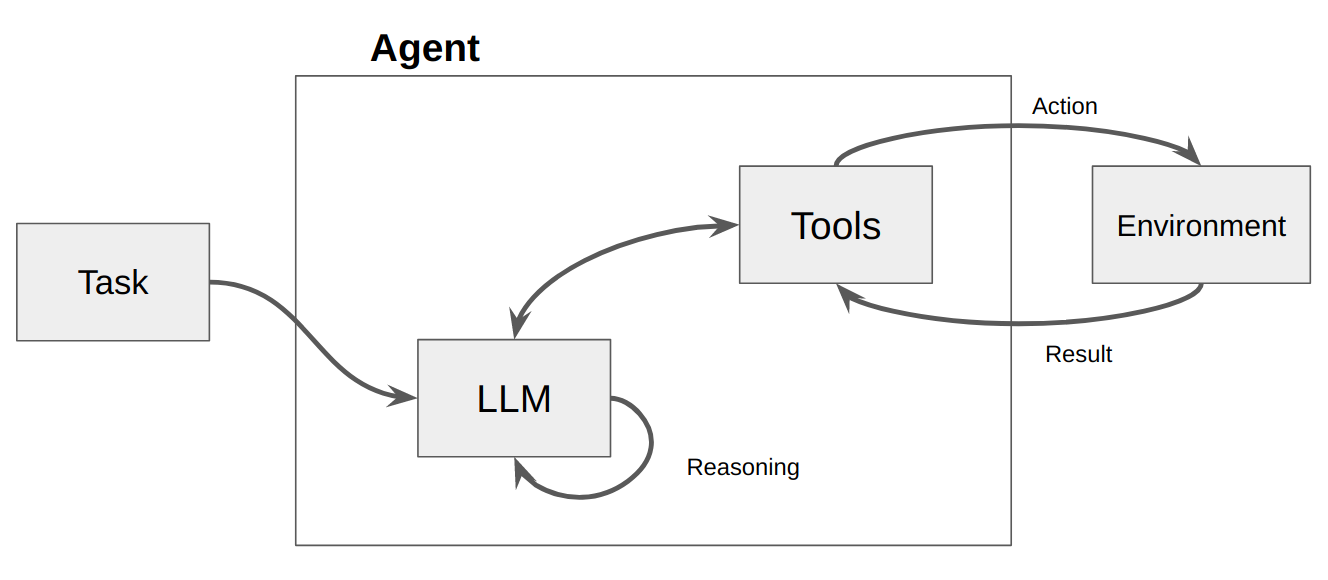